In [1]:
%matplotlib inline
#
# from lrgsglib.shared import *
from lrgsglib.core import *
# from lrgsglib.Ccore.statsys.RBIsingM.storer import ising_model_store

In [2]:
move_to_rootf()

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


### C implementation (IsingDynamics `class`)

In [3]:
side = 50
geo = 'squared'
pflip = 0.2
T_ising = .5
navg = 2
eqSTEP = 10
#
IMPORT = False

In [4]:
args = {'import_on': True} if IMPORT else {}
l = Lattice2D(side1=side, geo=geo, pflip=pflip, init_nw_dict=True, **args)
# l.flip_random_fract_edges()
l.flip_sel_edges(l.nwDict['randXERR']['G'])
l.compute_k_eigvV()
ising_dyn = IsingDynamics(sg=l, T=T_ising, 
                          nstepsIsing=1000, 
                          ic="ground_state_1",
                          runlang="C2")
ising_dyn.init_ising_dynamics()
if not l.import_on:
    # l.export_graph()
    l.export_edgel_bin()

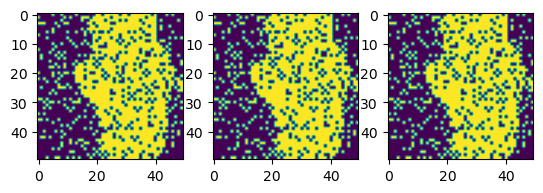

In [5]:
fig, ax = plt.subplots(ncols=3)
ax[0].imshow(np.sign(ising_dyn.s.reshape(l.syshape)))
ax[1].imshow(-np.sign(l.eigV[1].reshape(l.syshape)))
ax[2].imshow(np.fromfile(f'data/l2d_squared/ising/N={side**2}/s_sqr_p={pflip:.3g}.bin', dtype="int8").reshape(l.syshape))

0.8528


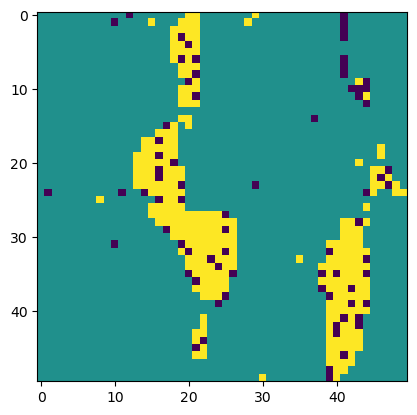

In [7]:
path = f"data/l2d_squared/ising/N={l.N}/s_sqr_p={pflip:.3g}.bin"
a = np.fromfile(path, dtype="int8").reshape(*l.syshape)
path = f"data/l2d_squared/ising/N={l.N}/sOut_sqr_p={pflip:.3g}_T={T_ising:.3g}_test2.bin"
b = np.fromfile(path, dtype="int8").reshape(-1, *l.syshape)
overlap = np.sum(a == b[-1]) / l.N
print(overlap)
plt.imshow(a-b[-1])

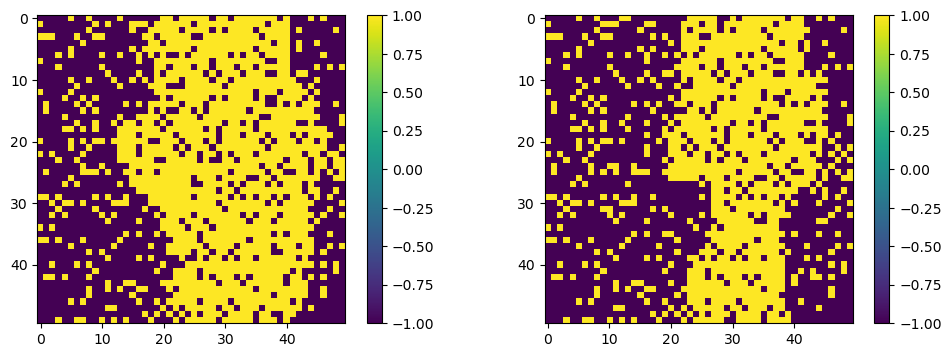

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
im1 = ax[0].imshow(a)
im2 = ax[1].imshow(b[-1])
fig.colorbar(im1, ax=ax[0])
fig.colorbar(im2, ax=ax[1])

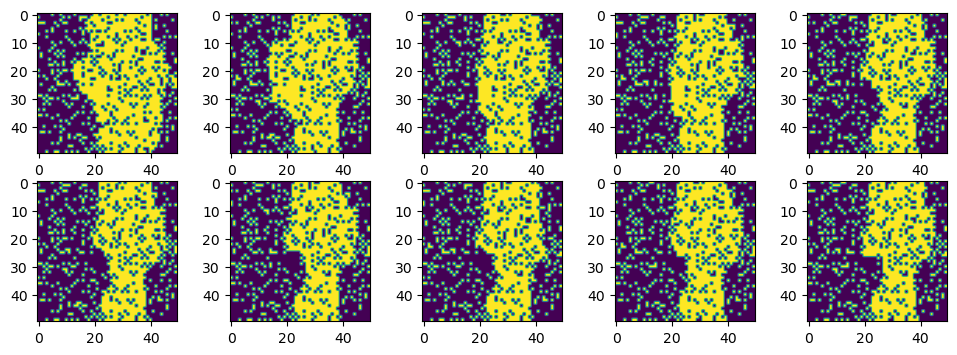

In [9]:
fig, ax = plt.subplots(ncols=5, nrows=len(b)//5, figsize=(12, 4))
for i in range(len(b)//5):
    for j in range(5):
        ax[i][j].imshow(b[i*5+j])

In [10]:
path = f"data/l2d_squared/ising/N={l.N}/ene_sqr_p={pflip:.3g}_T={T_ising:.3g}_test2.bin"
ene = np.fromfile(path, dtype="float")
path = f"data/l2d_squared/ising/N={l.N}/magn_sqr_p={pflip:.3g}_T={T_ising:.3g}_test2.bin"
magn = np.fromfile(path, dtype="float")
pflip, T_ising

(0.2, 0.5)

(-1.05, 1.05)

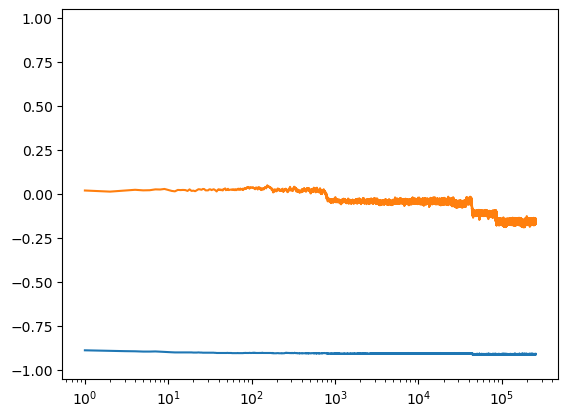

In [11]:
x = np.linspace(1, len(ene), len(ene))
plt.plot(x, ene/4)
plt.plot(x, magn)
plt.xscale("log")
plt.ylim(-1.05, 1.05)

In [ ]:
energies = []
for ic in tqdm(["ground_state_0", "uniform"]):
    ising_dyn = IsingDynamics(sg=l, T=T_ising, 
                          ic=ic, runlang="C2", upd_mode="sequential")
    ising_dyn.init_ising_dynamics()
    ising_dyn.run(eqSTEP=eqSTEP)
    sfxstr = ising_dyn.id_string_isingdyn if ising_dyn.id_string_isingdyn else "\"\""
    enepath = f"{l.isingpath}ene_{l.stdFname}_T={ising_dyn.T:.3g}_{sfxstr}.bin"
    ene = np.fromfile(enepath, dtype=float)
    energies.append(ene)

### Energy levels

In [ ]:
side = 48
geo = 'squared'
pbc = True
pflip = 0.5
howmany = 100
cmap = restr_twilight

In [ ]:
links = random.sample()

In [ ]:
l.GraphReprDict['G'].get_edge_data(0, 1)

In [ ]:
nx.get_edge_attributes(l.GraphReprDict['G'], 'weight')

In [ ]:
random_values = np.random.rand(l.N)
result = np.where(random_values < pflip, 1, -1)

In [ ]:
result

In [ ]:
l.flip_sel_edges(links)


In [ ]:
l = Lattice2D(side, geo, pbc=pbc, pflip=pflip)


In [ ]:
l = Lattice2D(side, geo, pbc=pbc, pflip=pflip)
# np.random.seed(1)
# random.seed(1)
l.flip_sel_edges()
l.compute_k_eigvV(howmany=howmany, MODE_dynspec="scipy")
energies = np.array([-l.compute_rbim_energy_eigV(_) for _ in range(howmany)])
en0 = np.max(np.abs(energies))
energies /= l.N

In [ ]:
fig, (ax, ax1) = plt.subplots(figsize=(10, 7), ncols=2, width_ratios=[1, 3])

ylabelPos = []
xlabelPos = []

y_min, y_max = min(energies), max(energies)
y_range = y_max - y_min
thresh = 0.05
threshold = y_range * thresh  # Adjust the fraction as needed

for i, en in enumerate(energies):
    color = cmap(i / len(energies)) if i != 0 else 'red'
    text_x = 1
    text_y = en
    if ylabelPos and any(abs(text_y - pos) < threshold for pos in ylabelPos):
        indices = [i for i, pos in enumerate(ylabelPos) 
                   if abs(text_y - pos) < threshold]
        index = max(indices, key=lambda i: xlabelPos[i])
        text_x = xlabelPos[index] +.3
    ax.axhline(en, 0.05, 1-0.05, lw=4, color=color, zorder=len(energies)-i+1)
    # ax.text(text_x+.05, text_y, fr'$E(|\lambda_{{{i}}}\rangle)$', 
    #          va='center', ha='left', fontsize=16, color=color)
    ylabelPos.append(text_y)
    xlabelPos.append(text_x)


# Customize the axes to remove the top and right box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
# # Add grid
# plt.ylim(-1, 1)
ax.grid(True)
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, len(energies))), ax=ax)
x, pdf = powerlaw.pdf(np.abs(l.eigV[0]))
ax1.loglog(x[1:], pdf, 'k-', lw=2)
ax1.axvline(np.finfo(float).eps, color='red', lw=2)

In [ ]:
replicas = 100

In [ ]:
def compute_overlap(matrix1, matrix2):
    return np.dot(matrix1.flatten(), matrix2.flatten()) / matrix1.size
eigV = []
l = Lattice2D(side, geo, pbc=pbc, pflip=pflip)
for i in range(replicas):
    l.flip_random_fract_edges()
    l.compute_k_eigvV(howmany=1, MODE_dynspec="numpy")
    eigV.append(l.eigV[0].reshape(l.syshape))
# Compute all pairs of overlaps
overlaps = []
for i in range(replicas):
    for j in range(i + 1, replicas):
        q = compute_overlap(eigV[i], eigV[j])
        overlaps.append(q)

In [ ]:
LRGSG_LIB_CBIN

### C++ attempt (slow)

In [ ]:
temperature = 1
pflip = 0
side = 50
pbc=True
geo = 'squared'
navg = 5
steps = side**2
frameRate = 1
single_mode = True

In [ ]:
l = Lattice2D(side, geo=geo, pflip=pflip, pbc=pbc)
#
l.flip_random_fract_edges()
edgeList = list(l.GraphReprDict['H'].edges())
nodeList = l.nodeList
signs = list(l.GraphReprDict['H'].edges(data='weight'))

In [ ]:
if single_mode:
#
    model = ising_model_store.IsingModel(edgeList, signs, side, side, 
                                            temperature, "asynchronous")
    model.simulate(steps, frameRate)
    ene = np.array(model.getFrameEnergies())
else: 
    magn = []
    ene = []
    for _ in range(navg):
        model = ising_model_store.IsingModel(edgeList, signs, side, side, 
                                            temperature, "asynchronous")
        model.simulate(steps, frameRate)
        magn.append([model.getFrameMagnetizations()])
        ene.append([model.getFrameEnergies()])

In [ ]:
for en in ene:
    tt = en[0]
    eneNorm = tt
    plt.plot(np.linspace(1, len(eneNorm), num=len(eneNorm)), eneNorm, '-')
# plt.plot(magn, 'h')
plt.xscale('log')
